# Test VCC functions

In [1]:
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
from lume_live_demo.vcc_image import LCLS2_VCC_PV, get_epics_vcc_data, vcc_image_data_from_pvdata, get_vcc_data, isolate_image
import numpy as np
import epics

In [3]:
LCLS2_VCC_PV.values()

dict_values(['CAMR:LGUN:950:Image:ArrayData', 'CAMR:LGUN:950:Image:ArraySize0_RBV', 'CAMR:LGUN:950:Image:ArraySize1_RBV', 'CAMR:LGUN:950:RESOLUTION', 'CAMR:LGUN:950:RESOLUTION.EGU'])

3.626845862169814

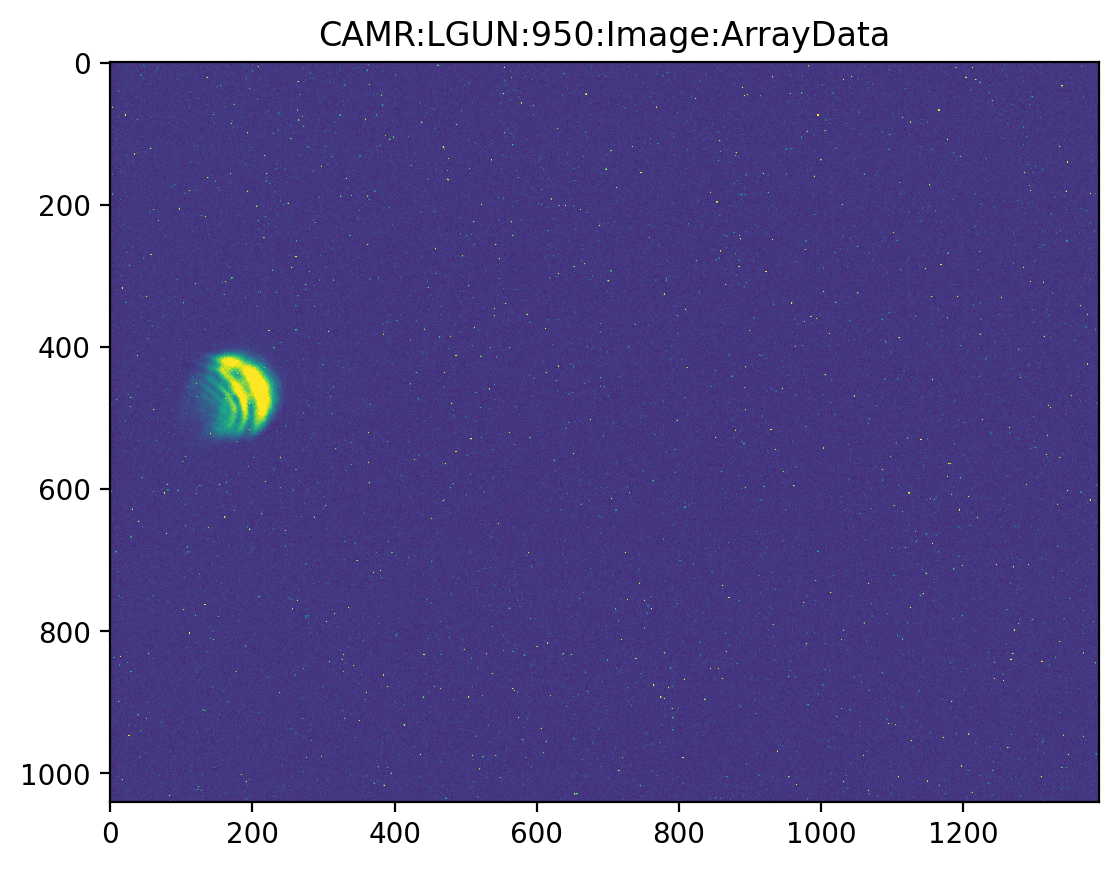

CA.Client.Exception...............................................
    Context: "localhost:24669"
    Source File: ../tcpiiu.cpp line 926
    Current Time: Fri Dec 02 2022 17:12:45.673410000
..................................................................
CA.Client.Exception...............................................
    Context: "localhost:24669"
    Source File: ../cac.cpp line 1237
    Current Time: Fri Dec 02 2022 17:12:58.733897000
..................................................................
CAC: error = "Network is unreachable" sending UDP msg to 198.129.119.255:5064
CAC: Unable to connect because "Connection refused"
CAC: Unable to connect because "Invalid argument"
CAC: Unable to connect because "Invalid argument"
CAC: Unable to connect because "Invalid argument"
CAC: Unable to connect because "Invalid argument"
CAC: Unable to connect because "Invalid argument"
CAC: Unable to connect because "Invalid argument"
CAC: Unable to connect because "Invalid argument"
CAC: U

In [18]:
import epics
import matplotlib.pyplot as plt
pvname = 'CAMR:LGUN:950:Image:ArrayData'
a = epics.caget(pvname).reshape((1040 , 1392))
plt.imshow(a, vmax=64)
plt.title(pvname)
a.std()

In [146]:
a = epics.caget('CAMR:LGUN:950:Image:ArrayData')
len(a), len(a) / 1392

(1446288, 1039.0)

In [136]:
1446288 % 1392

0

In [147]:
!caget CAMR:LGUN:950:Image:ArraySize0_RBV
!caget CAMR:LGUN:950:Image:ArraySize1_RBV

CAMR:LGUN:950:Image:ArraySize0_RBV 1392
CAMR:LGUN:950:Image:ArraySize1_RBV 1039


In [127]:
len(epics.caget('CAMR:LGUN:950:Image:ArrayData'))

1446288

In [85]:
epics.caget_many(LCLS2_VCC_PV.values())

[array([33, 34, 35, ..., 32, 31, 32], dtype=int16), 1392, 1040, 4.65, 'um/px']

In [ ]:
pvdata, itime = get_epics_vcc_data(epics, 'CAMR:LGUN:950', wait_for_good=True, good_std=4)

In [71]:
image_data = vcc_image_data_from_pvdata(pvdata, 'CAMR:LGUN:950')

image_data

1447680


{'size_x': 1392,
 'size_y': 1040,
 'resolution': 4.65,
 'resolution_units': 'um',
 'image': array([[34, 32, 32, ..., 35, 29, 30],
        [32, 33, 33, ..., 32, 31, 34],
        [35, 31, 34, ..., 31, 32, 35],
        ...,
        [29, 35, 32, ..., 32, 33, 32],
        [32, 33, 32, ..., 33, 34, 31],
        [31, 32, 32, ..., 32, 33, 32]], dtype=int16)}

15.065510360417555

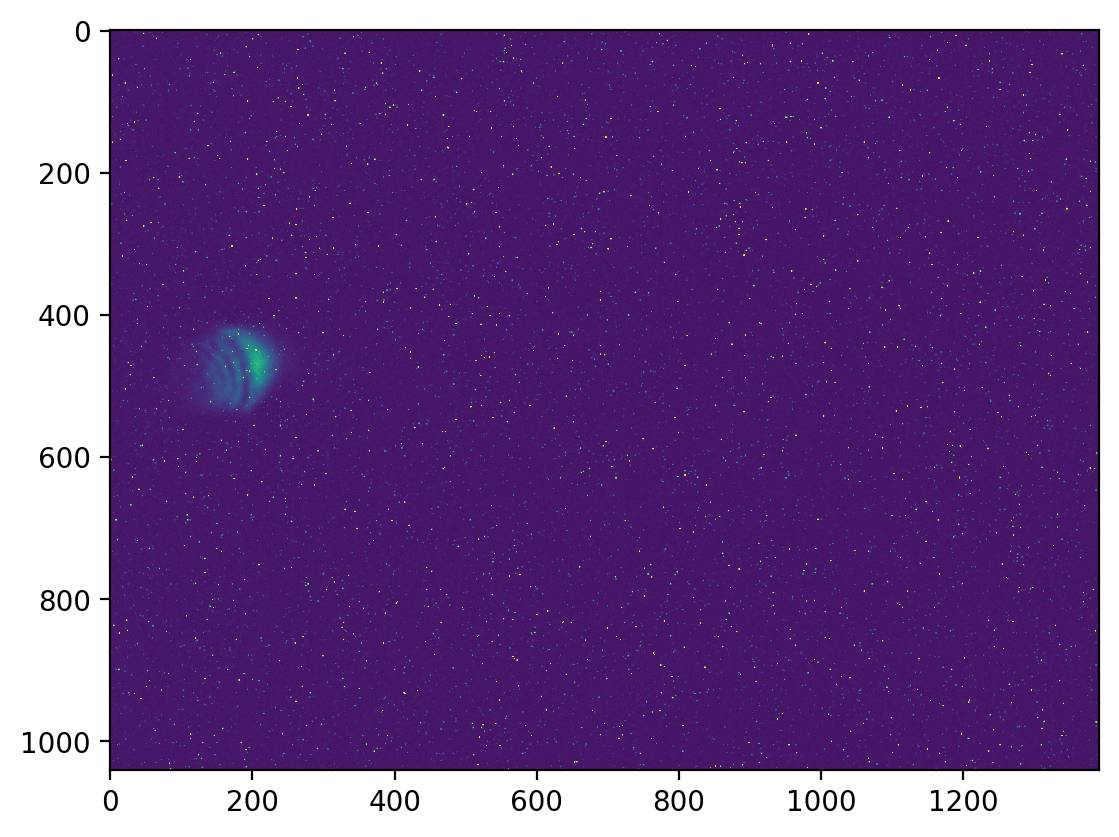

In [72]:
a = image_data['image']
plt.imshow(a, vmax=128)
a.std()

In [73]:
isolate_image(a, fclip=0.08)

IndexError: index 0 is out of bounds for axis 0 with size 0